# Kelompok 06

Terdiri atas:
1. Miranty Anjani Putri - NPM 2006468270
2. Qinthara Andini - NPM
3. Valya Sandria - NPM 2006522650

Dataset dan kode dapat diakses melalui link berikut: https://github.com/MirantyAnjaniPutri/UAS-Kecerdasan-Buatan-Kelompok-6

# Split the Data into Train, Val, and Set

In [ ]:
import os
import random
import shutil

def split_and_copy_images(source_dir, train_dir, val_dir, test_dir, train_size, val_size, test_size):
    '''
    Input:
    - Source directory: the cat class
    - Train directory: destination directory for training
    - Val directory: destination directory for validation
    - Test directory: destination directory for testing

    The purpose of this function is to copy the files from a directory of a cat class into train, val, and
    test directories based on the train, validation, and test size.
    '''
    # Create directories if they don't exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # List all files in the source directory
    files = os.listdir(source_dir)
    random.shuffle(files)  # Randomize the list of files

    # Calculate the number of files for each split
    total_files = len(files)
    num_train = int(total_files * train_size)
    num_val = int(total_files * val_size)
    num_test = int(total_files * test_size)

    # Copy files to the respective directories
    for i, file in enumerate(files):
        if i < num_train:
            shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))
        elif i < num_train + num_val:
            shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, file))
        else:
            shutil.copy(os.path.join(source_dir, file), os.path.join(test_dir, file))

In [ ]:
# Setting the size of train, validation, and test size
train_size = 0.8 # Training size is 80%
val_size = 0.1 # Validation size is 10%
test_size = 0.1 # Testing size is 10

background_dir = "C:/Users/miran/code kelas ai/UAS/Background"
bg_train_dir = "C:/Users/miran/code kelas ai/UAS/train/Background"
bg_val_dir = "C:/Users/miran/code kelas ai/UAS/val/Background"
bg_test_dir = "C:/Users/miran/code kelas ai/UAS/test/Background"
split_and_copy_images(background_dir, bg_train_dir, bg_val_dir, bg_test_dir, train_size, val_size, test_size)

calico_dir = "C:/Users/miran/code kelas ai/UAS/Calico"
calico_train_dir = "C:/Users/miran/code kelas ai/UAS/train/Calico"
calico_val_dir = "C:/Users/miran/code kelas ai/UAS/val/Calico"
calico_test_dir = "C:/Users/miran/code kelas ai/UAS/test/Calico"
split_and_copy_images(calico_dir, calico_train_dir, calico_val_dir, calico_test_dir, train_size, val_size, test_size)

hitam_dir = "C:/Users/miran/code kelas ai/UAS/Hitam"
hitam_train_dir = "C:/Users/miran/code kelas ai/UAS/train/Hitam"
hitam_val_dir = "C:/Users/miran/code kelas ai/UAS/val/Hitam"
hitam_test_dir = "C:/Users/miran/code kelas ai/UAS/test/Hitam"
split_and_copy_images(hitam_dir, hitam_train_dir, hitam_val_dir, hitam_test_dir, train_size, val_size, test_size)

hitam_putih_dir = "C:/Users/miran/code kelas ai/UAS/Hitam-Putih"
hp_train_dir = "C:/Users/miran/code kelas ai/UAS/train/Hitam-Putih"
hp_val_dir = "C:/Users/miran/code kelas ai/UAS/val/Hitam-Putih"
hp_test_dir = "C:/Users/miran/code kelas ai/UAS/test/Hitam-Putih"
split_and_copy_images(hitam_putih_dir, hp_train_dir, hp_val_dir, hp_test_dir, train_size, val_size, test_size)

orange_dir = "C:/Users/miran/code kelas ai/UAS/Orange"
oren_train_dir = "C:/Users/miran/code kelas ai/UAS/train/Orange"
oren_val_dir = "C:/Users/miran/code kelas ai/UAS/val/Orange"
oren_test_dir = "C:/Users/miran/code kelas ai/UAS/test/Orange"
split_and_copy_images(orange_dir, oren_train_dir, oren_val_dir, oren_test_dir, train_size, val_size, test_size)

putih_dir = "C:/Users/miran/code kelas ai/UAS/Putih"
putih_train_dir = "C:/Users/miran/code kelas ai/UAS/train/Putih"
putih_val_dir = "C:/Users/miran/code kelas ai/UAS/val/Putih"
putih_test_dir = "C:/Users/miran/code kelas ai/UAS/test/Putih"
split_and_copy_images(putih_dir, putih_train_dir, putih_val_dir, putih_test_dir, train_size, val_size, test_size)

# Import Datasets from Train, Val, and Test Directories

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Define transformations including data augmentation for the training set
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)), # Resize the images to 256 (width) x 256 (height)
    transforms.RandomHorizontalFlip(), #Horizontal flip the images
    transforms.RandomVerticalFlip(), # Vertical flip the images
    transforms.RandomRotation(20), # Random rotation for the images
    transforms.RandomResizedCrop(256, scale=(0.8, 1.2)),  # Zoom in and out
    transforms.RandomAffine(degrees=20, shear=0.2),  # Rotation and shear
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Color Jitter
    transforms.ToTensor(), # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transforms = transforms.Compose([
    transforms.Resize((256, 256)), # Resize the images to 256 (width) x 256 (height)
    transforms.ToTensor(), # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transforms = transforms.Compose([
    transforms.Resize((256, 256)), # Resize the images to 256 (width) x 256 (height)
    transforms.ToTensor(), # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the training, validation, and testing sets
train_dir = "C:/Users/miran/code kelas ai/UAS/train"
val_dir = "C:/Users/miran/code kelas ai/UAS/val"
test_dir = "C:/Users/miran/code kelas ai/UAS/test"

train_set = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_set = datasets.ImageFolder(root=val_dir, transform=val_transforms)
test_set = datasets.ImageFolder(root=test_dir, transform=test_transforms)

train_loader = DataLoader(train_set, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, shuffle=True, num_workers=2)

# Define the number of classes
# Classes: Background, Calico, Hitam, Hitam-Putih, Orange, Putih
num_classes = 6


In [23]:
def get_model(model_name, num_classes):
    '''
    Input:
    - Model_name: The name of the model we want to train
    - Num_classes: the number of classes for the output of the custom dataset

    The objective of this function is to get the architecture of the pretrained model and add the last layer
    for the output of the custom dataset. The model will then be returned.
    '''
    if model_name == "alexnet":
        model = models.alexnet(pretrained=True)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif model_name == "resnet":
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == "vgg":
        model = models.vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    else:
        raise ValueError("Model not supported")
    
    return model

In [24]:
def train(model, train_loader, criterion, optimizer, device):
    '''
    Input:
    - model: The model we've gathered from the function get_model
    - train_loader: The dataset that has been loaded using the Pytorch to be trained
    - criterion: The type of loss used for the model training
    - optimizer: The name of the optimizer used for the model training
    - device: The name of the gpu device used for the model training

    Output:
    - training_loss: the average of loss value for model training
    - accuracy: the accuracy of each epoch for model training

    The objective of this function is to train the pretrained model on our custom dataset.
    '''
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    return running_loss / len(train_loader), accuracy

In [25]:
def evaluate(model, val_loader, criterion, device):
    '''
    Input:
    - model: The model we've gathered from the function get_model
    - val_loader: The validation dataset that has been loaded using the Pytorch to be trained
    - criterion: The type of loss used for the model training
    - device: The name of the gpu device used for the model training

    Output:
    - val_loss: the average of loss value for model validation
    - accuracy: the accuracy of each epoch for model validation

    The objective of this function is to train the pretrained model on our custom dataset.
    '''
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    return running_loss / len(val_loader), accuracy

In [26]:
from sklearn.metrics import classification_report

def generate_classification_report(model, test_loader, device, class_names):
    '''
    Input:
    - model: The model we've gathered from the function get_model
    - test_loader: The test dataset that has been loaded using the Pytorch to be trained
    - device: The name of the gpu device used for the model training
    - class_names: The list of class names

    Output:
    - report: the precision, recall, and f1-score of the model

    The objective of this function is to generate the report for the pretrained model
    on our custom dataset.
    '''
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    report = classification_report(all_labels, all_preds, target_names=class_names)
    return report

In [27]:
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Number of epochs
num_epochs = 50
# The names of the models to be trained:
# Alexnet, ResNet, and VGG
model_names = ["alexnet", "resnet", "vgg"]

# Class names
class_names = train_set.classes

# Train loop for model_names
for model_name in model_names:
    print(f"Training {model_name} model...")
    model = get_model(model_name, num_classes)
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {val_loss:.4f}, "
              f"Validation Accuracy: {val_accuracy:.4f}")
    
    # Save the trained model
    model_path = f"{model_name}_model.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved at {model_path}\n")

    # Generate classification report on the test set
    report = generate_classification_report(model, test_loader, device, class_names)
    print(f"Classification Report for {model_name}:\n{report}\n")

    print(f"Training complete for {model_name}\n")


Training alexnet model...
Epoch [1/50], Train Loss: 2.1328, Train Accuracy: 0.1341, Validation Loss: 1.7735, Validation Accuracy: 0.2857
Epoch [2/50], Train Loss: 1.8447, Train Accuracy: 0.1707, Validation Loss: 1.7748, Validation Accuracy: 0.2857
Epoch [3/50], Train Loss: 1.8115, Train Accuracy: 0.1098, Validation Loss: 1.7726, Validation Accuracy: 0.2857
Epoch [4/50], Train Loss: 1.8396, Train Accuracy: 0.1220, Validation Loss: 1.7674, Validation Accuracy: 0.2857
Epoch [5/50], Train Loss: 1.8556, Train Accuracy: 0.1341, Validation Loss: 1.8356, Validation Accuracy: 0.1429
Epoch [6/50], Train Loss: 1.8352, Train Accuracy: 0.1098, Validation Loss: 1.7727, Validation Accuracy: 0.2857
Epoch [7/50], Train Loss: 1.8067, Train Accuracy: 0.1951, Validation Loss: 1.7720, Validation Accuracy: 0.2857
Epoch [8/50], Train Loss: 1.8011, Train Accuracy: 0.2073, Validation Loss: 1.7737, Validation Accuracy: 0.2857
Epoch [9/50], Train Loss: 1.8050, Train Accuracy: 0.1341, Validation Loss: 1.7758, Val

c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Classification Report for alexnet:
              precision    recall  f1-score   support

  Background       0.00      0.00      0.00         2
      Calico       0.00      0.00      0.00         3
       Hitam       0.00      0.00      0.00         2
 Hitam-Putih       0.19      1.00      0.32         3
      Orange       0.00      0.00      0.00         3
       Putih       0.00      0.00      0.00         3

    accuracy                           0.19        16
   macro avg       0.03      0.17      0.05        16
weighted avg       0.04      0.19      0.06        16


Training complete for alexnet

Training resnet model...
Epoch [1/50], Train Loss: 2.1456, Train Accuracy: 0.1341, Validation Loss: 1.9932, Validation Accuracy: 0.1429
Epoch [2/50], Train Loss: 2.0192, Train Accuracy: 0.1220, Validation Loss: 1.8132, Validation Accuracy: 0.2857
Epoch [3/50], Train Loss: 1.9327, Train Accuracy: 0.1220, Validation Loss: 1.8052, Validation Accuracy: 0.1429
Epoch [4/50], Train Loss: 2.0347

c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Classification Report for resnet:
              precision    recall  f1-score   support

  Background       0.00      0.00      0.00         2
      Calico       0.00      0.00      0.00         3
       Hitam       0.00      0.00      0.00         2
 Hitam-Putih       0.25      0.33      0.29         3
      Orange       0.17      0.67      0.27         3
       Putih       0.00      0.00      0.00         3

    accuracy                           0.19        16
   macro avg       0.07      0.17      0.09        16
weighted avg       0.08      0.19      0.10        16


Training complete for resnet

Training vgg model...


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\miran/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [01:35<00:00, 5.77MB/s] 


Epoch [1/50], Train Loss: 2.3631, Train Accuracy: 0.1585, Validation Loss: 1.9153, Validation Accuracy: 0.1429
Epoch [2/50], Train Loss: 1.9977, Train Accuracy: 0.1220, Validation Loss: 1.7899, Validation Accuracy: 0.1429
Epoch [3/50], Train Loss: 1.8904, Train Accuracy: 0.1463, Validation Loss: 1.7942, Validation Accuracy: 0.1429
Epoch [4/50], Train Loss: 1.8463, Train Accuracy: 0.2073, Validation Loss: 1.7857, Validation Accuracy: 0.2857
Epoch [5/50], Train Loss: 1.8977, Train Accuracy: 0.1463, Validation Loss: 1.8062, Validation Accuracy: 0.1429
Epoch [6/50], Train Loss: 1.8468, Train Accuracy: 0.2195, Validation Loss: 1.8235, Validation Accuracy: 0.1429
Epoch [7/50], Train Loss: 1.9284, Train Accuracy: 0.1341, Validation Loss: 1.7791, Validation Accuracy: 0.2857
Epoch [8/50], Train Loss: 1.8427, Train Accuracy: 0.2073, Validation Loss: 1.8088, Validation Accuracy: 0.1429
Epoch [9/50], Train Loss: 1.8385, Train Accuracy: 0.1585, Validation Loss: 1.7898, Validation Accuracy: 0.1429
E

c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\miran\anaconda3\envs\train_yolo\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

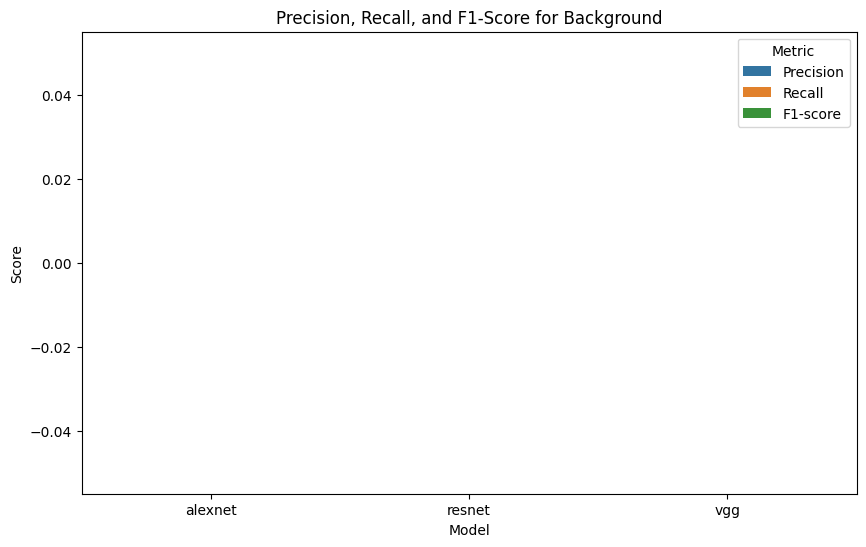

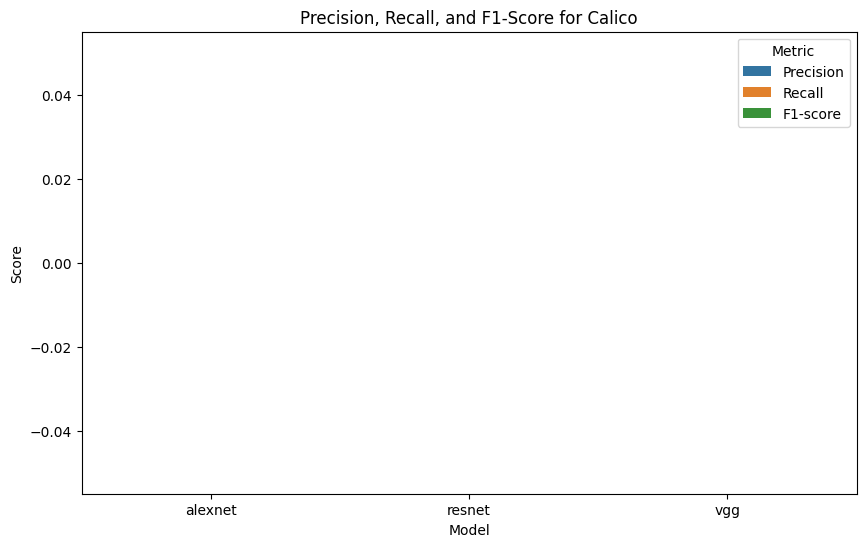

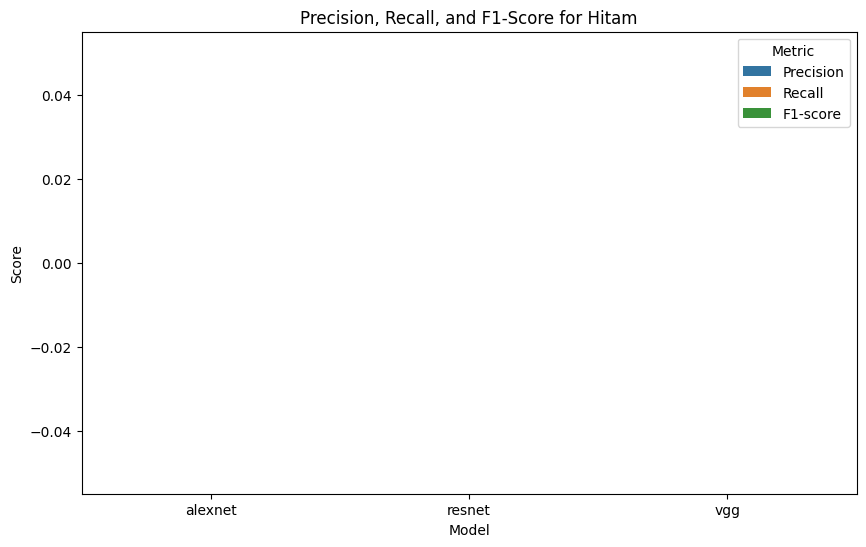

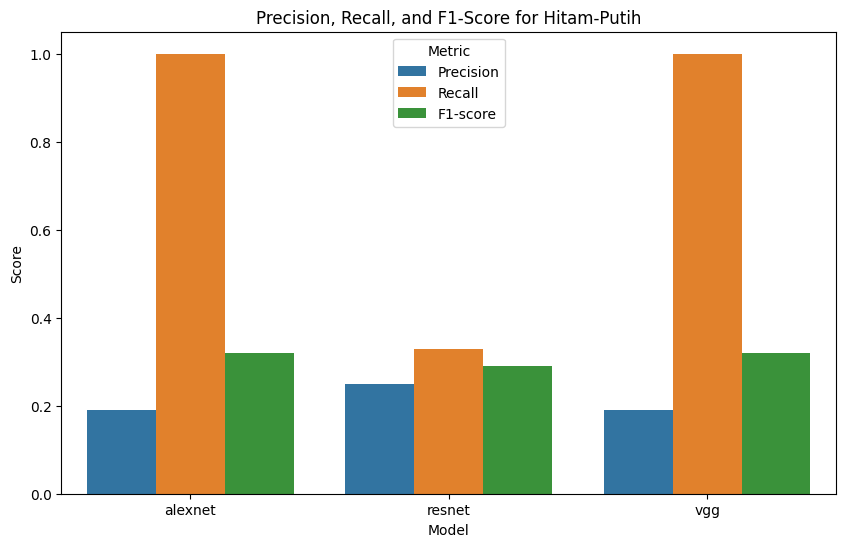

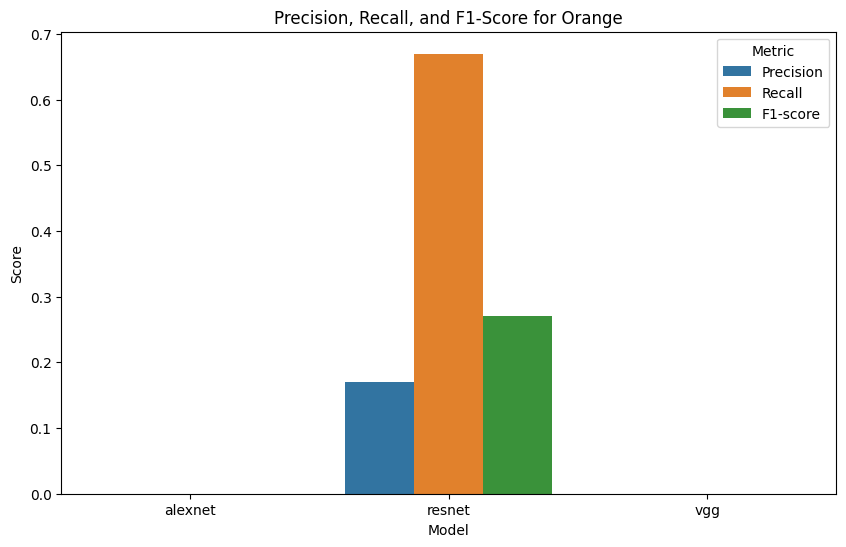

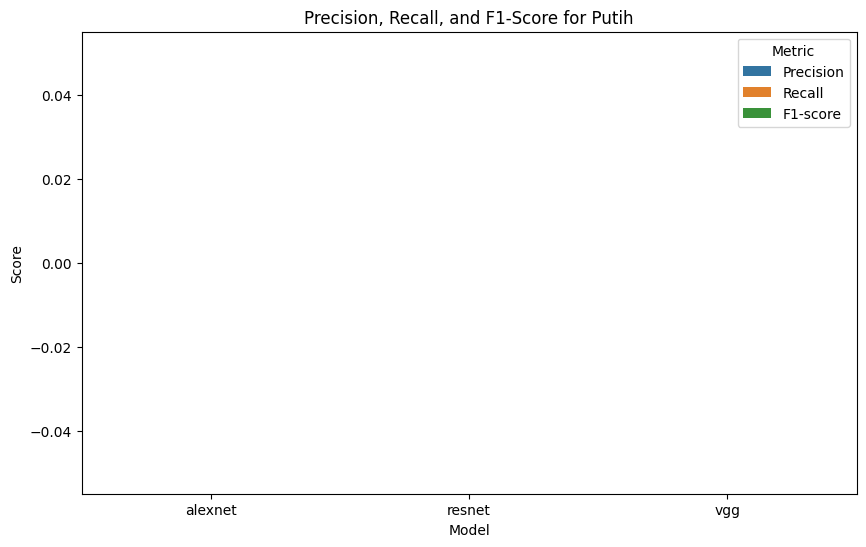

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data
models = ['alexnet', 'resnet', 'vgg']
precision = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0.19, 0.25, 0.19], [0, 0.17, 0], [0, 0, 0]]
recall = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [1.0, 0.33, 1.0], [0, 0.67, 0], [0, 0, 0]]
f1_score = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0.32, 0.29, 0.32], [0, 0.27, 0], [0, 0, 0]]
classes = ["Background", "Calico", "Hitam", "Hitam-Putih", "Orange", "Putih"]

# Function to create bar plot for each class
def create_bar_plot(prec, rec, f1, class_name):
    # Create a DataFrame
    data = {
        'Model': models * 3,
        'Metric': ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1-score'] * len(models),
        'Score': prec + rec + f1
    }
    df = pd.DataFrame(data)

    # Plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Score', hue='Metric', data=df)
    plt.title(f'Precision, Recall, and F1-Score for {class_name}')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.legend(title='Metric')
    plt.show()

# Create bar plots for each class
for class_name, prec, rec, f1 in zip(classes, precision, recall, f1_score):
    create_bar_plot(prec, rec, f1, class_name)

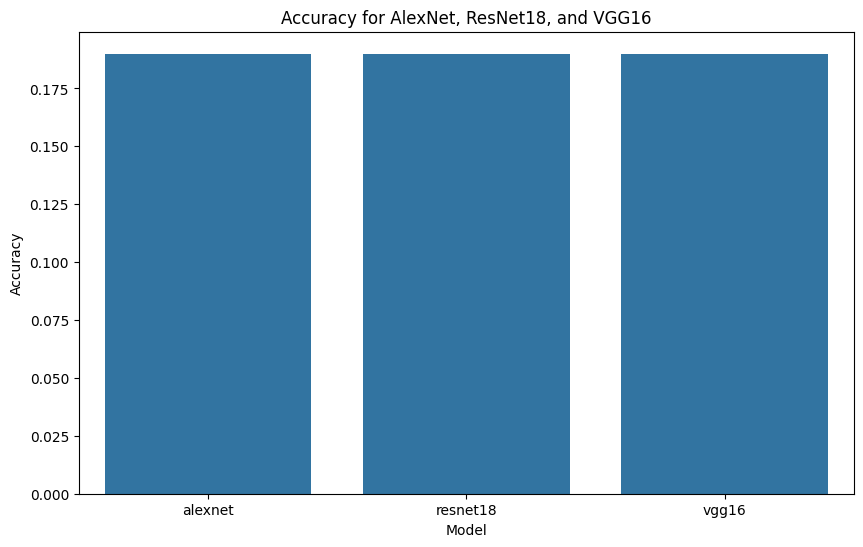

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data
models = ['alexnet', 'resnet18', 'vgg16']
accuracy = [0.19, 0.19, 0.19]

# Create a DataFrame
data = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data)
plt.title('Accuracy for AlexNet, ResNet18, and VGG16')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()